# Shop Customer - Classification

[**Data by SHRUTI_IYYER from Kaggle**](https://www.kaggle.com/datasets/shrutimechlearn/customer-data)

A project to predict if a customer is 'good', which I defined as a customer that has a Spending Score equal or above 50.

*Import the most important libraries*

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

importing the Dataset

In [31]:
dataset = pd.read_csv('Customers.csv')
dataset.drop(columns=['CustomerID'], inplace=True)
dataset.insert(loc=4, column='GoodCustomer', value=(dataset.Spending_Score.values > 50).astype(int))

In [32]:
dataset

,Genre,Age,Annual_Income_(k$),Spending_Score,GoodCustomer
0,Male,19,15,39,0
1,Male,21,15,81,1
2,Female,20,16,6,0
3,Female,23,16,77,1
4,Female,31,17,40,0
...,...,...,...,...,...
195,Female,35,120,79,1
196,Female,45,126,28,0
197,Male,32,126,74,1
198,Male,32,137,18,0


Selecting the dependent and independent variables. As independent variables I select the Annual Income and the Age.

In [33]:
X = dataset.iloc[:, 1:3].values
y = dataset.iloc[:, -1].values

Splitting the data into a Training and Test set: 

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

Apply Feature Scaling to the values: 

In [35]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Logistic Regression

Train the Logistic Regression algorithm: 

In [36]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

Identify the categories of the test data with the trained classifier: 

In [37]:
y_pred = classifier.predict(X_test)

Create a confusion matrix and calculate the accuracy score to evaluate the model:

In [38]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm_log = confusion_matrix(y_test, y_pred)
print(cm_log)

acc_log = accuracy_score(y_test, y_pred)
acc_log

[[23  4]
 [ 8 15]]


0.76

This Logistic Regression Model gets 76 % of the prediction right. In the next step this is visualized.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


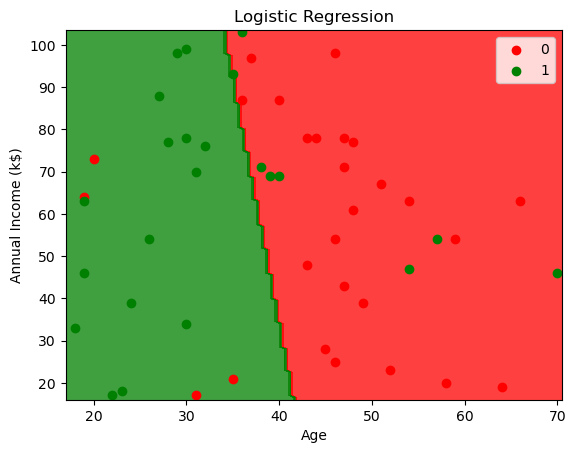

In [39]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.5),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.5))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression')
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.legend()
plt.show()

This results suggest that a "good customer" is most likely someone below 40. The income doesn't seem to have an effect if someone classifies as a "good customer".

## K-Nearest Neighbour (K-NN)

Train the K-NN model that uses the Euclidean Distance as metric and 5 as number of neighbors 

In [40]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(
    n_neighbors=5, 
    metric='minkowski'
)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

Use to trained model to make a predictions with the Test set:

In [41]:
y_pred = classifier.predict(X_test)

Calculate the confusion matrix and the accuracy score: 

In [42]:
from sklearn.metrics import accuracy_score, confusion_matrix
cm_knn = confusion_matrix(y_test, y_pred)
print(cm_knn)
acc_knn = accuracy_score(y_test, y_pred)
acc_knn

[[20  7]
 [ 7 16]]


0.72

So the KNN model gets 72 % of the predictions right.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


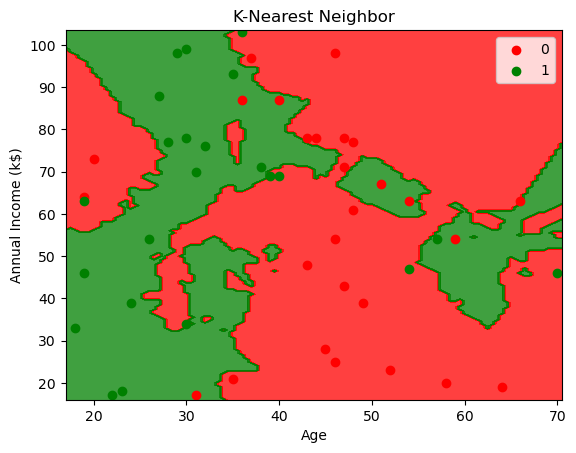

In [43]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.5),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.5))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('K-Nearest Neighbor')
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.legend()
plt.show()

This time there is no clear distinction between old and young customers. I could be that customers over 40 with a medium Annual Income (40k-70k) are also 'good customers', but there's also the danger that this is just the case because the classifier was overfitted to the training set.

Let's use k-Fold Cross Validation to investigate this further:

## Support Vector Machine (SVM)

## Naive Bayes

## Decision Tree Classification

## Random Forest Classification

## **Comparison**

Let's compare the accuracy of the different models!

**Logistic Regression**

**K-Nearest Neighbour (K-NN)**

**Support Vector Machine (SVM)**

**Naive Bayes**

**Decision Tree Classification**

**Random Forest Classification**